# Construct a Variational Autoencoder (VAE) for Image Reconstruction by the Animation Faces Dataset
Image from https://drive.google.com/file/d/19YL_FCG3dURkiFUuq1mv8BBZH0jPWTj_/view

In [198]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
from torchvision import datasets
from torch.utils.data import DataLoader
from IPython.display import Image
from IPython.core.display import Image, display
from VAE import VAE

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [97]:
learning_rate = 1e-3
batch_size = 128
num_epoch = 200

In [98]:
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
])
data = datasets.ImageFolder('./anime-faces',transform = transform)
dataloader = DataLoader(data, batch_size = batch_size, shuffle = True)
len(data.imgs), len(dataloader)

(21551, 169)

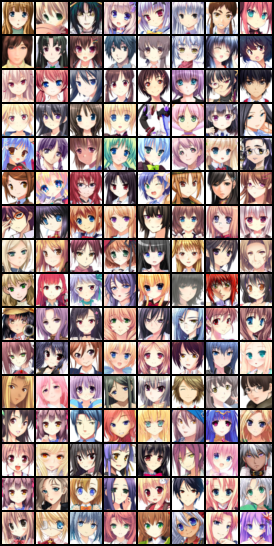

In [99]:
fixed_x, _ = next(iter(dataloader))
save_image(fixed_x, 'real_image.png')

Image('real_image.png')

In [199]:
model = VAE().to(device)
model

VAE(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride

In [102]:
def loss_fun(recon_x, x, mu, logvar, multiple_num = 1):
    reconst_loss = F.mse_loss(recon_x, x, reduction='sum')
    kl_div = - 0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconst_loss + multiple_num*kl_div

In [103]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [104]:
ELBO = []
for epoch in range(num_epoch):
    num_data = 0
    total_loss = 0
    for i, (images, _) in enumerate(dataloader):
        images = images.to(device)
        batch_num = len(images)
        num_data += batch_num
        recon_images, mu, log_var = model(images)
        loss = loss_fun(recon_images, images, mu, log_var)
        total_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    ELBO.append(total_loss)
    if (epoch+1) % 10 == 0:
        print('Train epoch: {}/{} Training Loss: {}'.format(epoch+1, num_epoch, total_loss/num_data))

Train epoch: 10/200 Training Loss: 81.62602233886719
Train epoch: 20/200 Training Loss: 77.54524230957031
Train epoch: 30/200 Training Loss: 76.06708526611328
Train epoch: 40/200 Training Loss: 75.36045837402344
Train epoch: 50/200 Training Loss: 74.87942504882812
Train epoch: 60/200 Training Loss: 74.24156188964844
Train epoch: 70/200 Training Loss: 73.93695831298828
Train epoch: 80/200 Training Loss: 73.62692260742188
Train epoch: 90/200 Training Loss: 73.36901092529297
Train epoch: 100/200 Training Loss: 72.95953369140625
Train epoch: 110/200 Training Loss: 72.89505767822266
Train epoch: 120/200 Training Loss: 72.60560607910156
Train epoch: 130/200 Training Loss: 72.49095153808594
Train epoch: 140/200 Training Loss: 72.32568359375
Train epoch: 150/200 Training Loss: 71.97120666503906
Train epoch: 160/200 Training Loss: 71.87354278564453
Train epoch: 170/200 Training Loss: 71.74931335449219
Train epoch: 180/200 Training Loss: 71.70039367675781
Train epoch: 190/200 Training Loss: 71.6

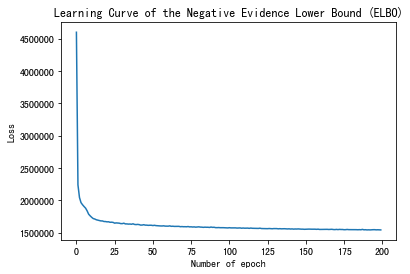

In [118]:
import matplotlib.pyplot as plt
plt.plot(list(range(num_epoch)),ELBO)
plt.xlabel('Number of epoch')
plt.ylabel('Loss')
plt.title('Learning Curve of the Negative Evidence Lower Bound (ELBO)')
plt.show()

In [105]:
torch.save(model.state_dict(), 'params.pkl')

In [90]:
def compare(x):
    recon_x, _, _ = model(x)
    return torch.cat([x, recon_x],0)

In [56]:
from random import randint

In [202]:
model = VAE()

In [203]:
model.load_state_dict(torch.load('params.pkl', map_location=torch.device('cpu')))
model.eval()

VAE(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride

# Real samples in dataset

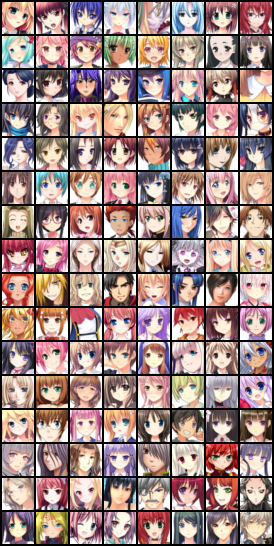

In [204]:
fixed_x = next(iter(dataloader))[0]
save_image(fixed_x.data, 'sample_image.png')
display(Image('sample_image.png', width=400, unconfined=True))

# Reconstruction samples using VAE

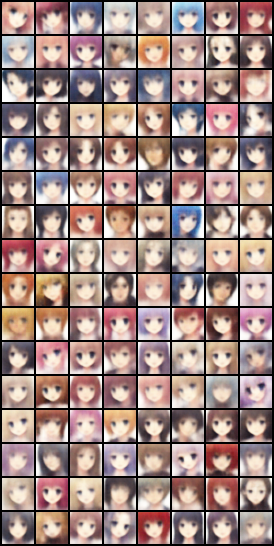

In [205]:
recon_x, _, _ = model(fixed_x)
save_image(recon_x.data, 'recon_image.png')
display(Image('recon_image.png', width=400, unconfined=True))

# Sample the prior p(z) and use the latent codes z to synthesize some examples when your model is well-trained.

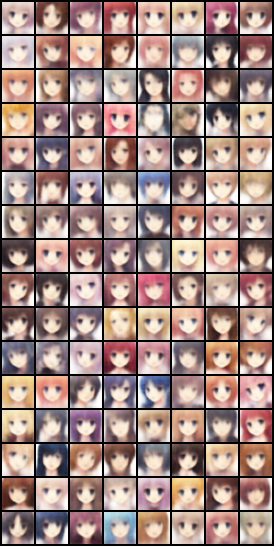

In [189]:
z = torch.randn(batch_size, 128)
out1 = model.decode(z)
save_image(out1.data, 'normal_image.png')
display(Image('normal_image.png', width=400, unconfined=True))

# Show the synthesized images based on the interpolation of two latent codes z between two real samples.

In [133]:
x1 = data[randint(1, 100)][0].unsqueeze(0)
mu1, log_var1 = model.encode(x1)
z1 = model.reparameterize(mu1, log_var1)
x2 = data[randint(1, 100)][0].unsqueeze(0)
mu2, log_var2 = model.encode(x2)
z2 = model.reparameterize(mu2, log_var2)
z3 = (z2-z1)/7

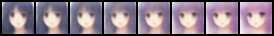

In [197]:
n = 0
img1 = []
while n <= 7:
    zz = z1+n*z3
    out = model.decode(zz)
    img1.append(out)
    n+=1
img1 = torch.tensor([item.detach().numpy() for item in img1])
img1 = img1.view(-1,3,32,32)
save_image(img1.data, 'interpolation_img.png')
display(Image('interpolation_img.png', width=400, unconfined=True))